# Derivation of data with noise

## Scope

* Finite number $N$ of data points $(x,y)$ are available, this data include noise: compute the derivative $\dfrac{dx}{dy}$



In [1]:
#setup
%load_ext autoreload
%matplotlib nbagg
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl


## Introduction ...

### The data set : a synthetique data set with some noise

In [2]:
N = 100
xmin, xmax = 0., 4
x = np.linspace(xmin, xmax, N)
y = (3.3 * x -2) + .3*np.random.randn(N)

<IPython.core.display.Javascript object>


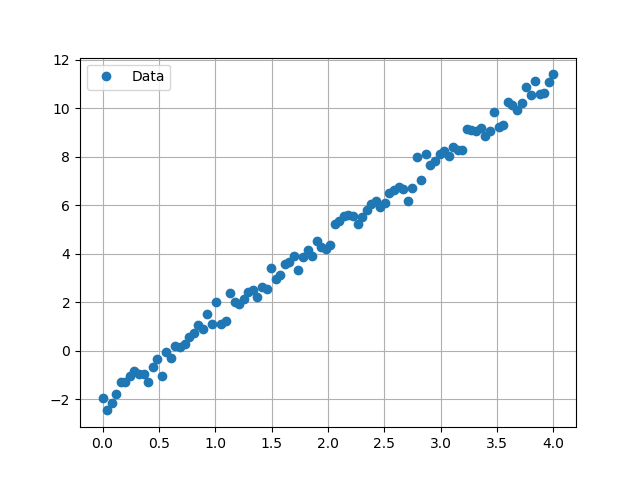

In [3]:
fig = plt.figure()
plt.plot(x,y,'o',label = "Data")
plt.legend()
plt.grid()

## GPS point data set

In [25]:
import gpxpy
import gpxpy.gpx
from geopy.distance import great_circle

gpx_file = open( 'RK_gpx.gpx', 'r' )



gpx = gpxpy.parse(gpx_file)
df = pd.DataFrame([] , index = [], columns = ['time','seconde', 'lat', 'long','elevation','dist'])
i=0
t0 = gpx.tracks[0].segments[0].points[0].time

for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            if i==0:
                df.loc[i]=[(point.time-t0),(point.time-t0).seconds,point.latitude, point.longitude, point.elevation,0]
            else:
                dist = df.dist[i-1]+great_circle((point.latitude,point.longitude) , (df.lat[i-1],df.long[i-1]))
                df.loc[i]=[(point.time-t0),(point.time-t0).seconds,point.latitude, point.longitude, point.elevation,dist]
            i=i+1


TypeError: unsupported operand type(s) for +: 'int' and 'great_circle'

In [23]:
df

,time,seconde,lat,long,elevation,dist
0,00:00:00,0,52.242821,6.850292,32.0,0
1,00:04:34,274,52.243366,6.851354,32.0,0.09437099325213615 km
2,00:04:45,285,52.243218,6.851455,30.3,0.0178408415063119 km
3,00:04:45,285,52.243218,6.851455,30.4,0.0 km
4,00:05:02,302,52.242878,6.852036,30.5,0.054734268730395316 km
5,00:05:03,303,52.242837,6.852226,30.6,0.013720108206401413 km
6,00:05:05,305,52.242939,6.852375,30.6,0.01522127334879804 km
7,00:05:06,306,52.243047,6.852549,30.5,0.016873918246641882 km
8,00:05:08,308,52.243116,6.852642,30.4,0.009950705618272798 km
9,00:05:11,311,52.243203,6.852740,30.2,0.011755192070489936 km


In [10]:
great_circle((df.lat[1],df.long[1]) , (df.lat[0],df.long[0]))

Distance(0.09437099325213615)

<IPython.core.display.Javascript object>


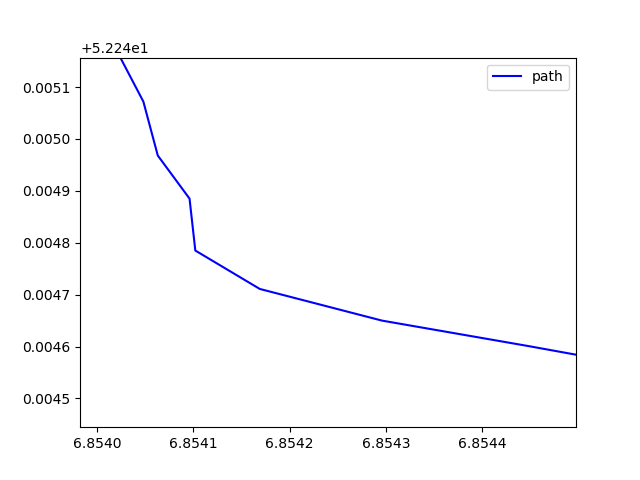

In [11]:
fig = plt.figure()
plt.plot(df.long,df.lat,'b',label = "path")
plt.legend()

In [16]:
df.size

3138